In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
from warnings import filterwarnings
# Import Deep Learning libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

c:\Users\sukha\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\sukha\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\sukha\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framewo

In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\sukha\Downloads\DATA_SCIENCE\DATASET\Cleaned_DATA.csv")

# --- 1. Data Preparation ---
df = df.drop(columns=['Country', 'Month'])
target_column = 'Reservoir_Water_Storage_BCM'
y = df[target_column]
X = df.drop(columns=[target_column])

In [3]:


# --- 2. Handle Categorical Features (One-Hot Encoding) ---
categorical_cols = ['State', 'District', 'Reservoir Basin Name', 'Reservoir Name']
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


In [4]:

# --- 3. Split Data ---
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

In [5]:


# --- 4. Feature Scaling (Crucial for Neural Networks) ---
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Convert outputs to NumPy arrays for Keras
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

print(f"Data scaled and prepared. X_train shape: {X_train_scaled.shape}")

Data scaled and prepared. X_train shape: (42900, 584)


In [6]:
# --- 1. Define Model Architecture ---
# Get the number of features for the input layer
input_dim = X_train_scaled.shape[1]

# Initialize the Sequential model
model = Sequential()

# First Hidden Layer: 128 neurons
model.add(Dense(128, activation='relu', input_shape=(input_dim,)))

# Second Hidden Layer: 64 neurons
model.add(Dense(64, activation='relu'))

# Dropout Layer: Randomly set 20% of inputs to 0 to prevent overfitting
model.add(Dropout(0.2))

# Output Layer: 1 neuron with linear activation for regression
model.add(Dense(1, activation='linear'))



c:\Users\sukha\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# --- 2. Compile the Model ---
# Use the Adam optimizer and Mean Squared Error (MSE) as the loss function
model.compile(
    optimizer=Adam(learning_rate=0.001), 
    loss='mse', 
    metrics=['mae'] # Track Mean Absolute Error during training
)

# Display the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        74,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,201 (325.00 KB)

 Trainable params: 83,201 (325.00 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# --- 1. Train the Model ---
print("Starting Neural Network Model Training...")

# Train the model
history = model.fit(
    X_train_scaled, 
    y_train_np,
    # Use 10% of training data for validation during training
    validation_split=0.1, 
    epochs=20, # Number of passes through the entire dataset
    batch_size=32, # Number of samples per gradient update
    verbose=1
)

print("\nNeural Network Regressor Model training complete.")



Starting Neural Network Model Training...
Epoch 1/20
1207/1207 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.1930 - mae: 0.1826 - val_loss: 0.1373 - val_mae: 0.1108
Epoch 2/20
1207/1207 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.1286 - mae: 0.1136 - val_loss: 0.1203 - val_mae: 0.1048
Epoch 3/20
1207/1207 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.1277 - mae: 0.1125 - val_loss: 0.1325 - val_mae: 0.1112
Epoch 4/20
1207/1207 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.1236 - mae: 0.1102 - val_loss: 0.1351 - val_mae: 0.1076
Epoch 5/20
1207/1207 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.1199 - mae: 0.1106 - val_loss: 0.1270 - val_mae: 0.1071
Epoch 6/20
1207/1207 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.1195 - mae: 0.1114 - val_loss: 0.1171 - val_mae: 0.1028
Epoch 7/20
1207/1207 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.1180 - mae: 0.1127 - val_loss: 0.1069 - val_mae: 0.0996
Epoch 8/20
1207/1207 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.1173 - mae: 0.1117 - val_loss: 0.1132 - val_mae: 0.10

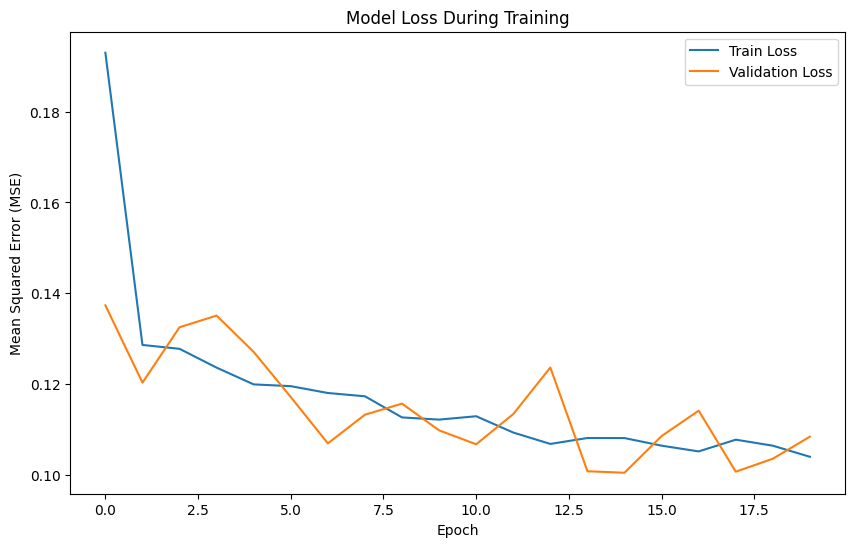

In [9]:
# Optional: Visualize training loss (MSE)
# This helps check for convergence and overfitting
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()

In [10]:
# --- 1. Make Predictions ---
# Predict the reservoir water storage on the scaled test set
y_pred_dl = model.predict(X_test_scaled).flatten()

# --- 2. Calculate Evaluation Metrics ---
# Note: Keras uses NumPy arrays, so we can directly use sklearn metrics
mae = mean_absolute_error(y_test_np, y_pred_dl)
r2 = r2_score(y_test_np, y_pred_dl)
mse = np.mean((y_test_np - y_pred_dl)**2)
rmse = np.sqrt(mse)

# --- 3. Display Results ---
print("--- Deep Learning (MLP) Regressor Model Evaluation ---")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R^2): {r2:.4f}")

336/336 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step
--- Deep Learning (MLP) Regressor Model Evaluation ---
Mean Absolute Error (MAE): 0.0993
Mean Squared Error (MSE): 0.1001
Root Mean Squared Error (RMSE): 0.3163
R-squared (R^2): 0.7535


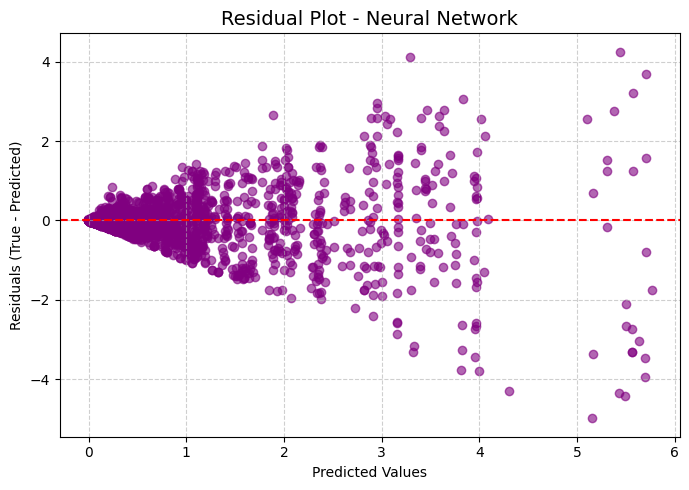

In [13]:
import numpy as np

residuals = y_test - y_pred_dl

plt.figure(figsize=(7,5))
plt.scatter(y_pred_dl, residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot - Neural Network', fontsize=14)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (True - Predicted)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
